In [21]:
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
from matplotlib.colors import LinearSegmentedColormap

In [4]:
tspan = ("2024-07-01", "2024-08-25")
bbox = (-170, 23, -140, 33)

In [24]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL_NRT",
    temporal=tspan,
    bounding_box=bbox,
    granule_name="*.DAY.*.4km.*",
)

paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/56 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/56 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/56 [00:00<?, ?it/s]

In [38]:

# Subset the dataset within the specified region
subset = dataset.sel(lon=slice(-165, -145), lat=slice(30, 18))
chla = subset["chlor_a"]

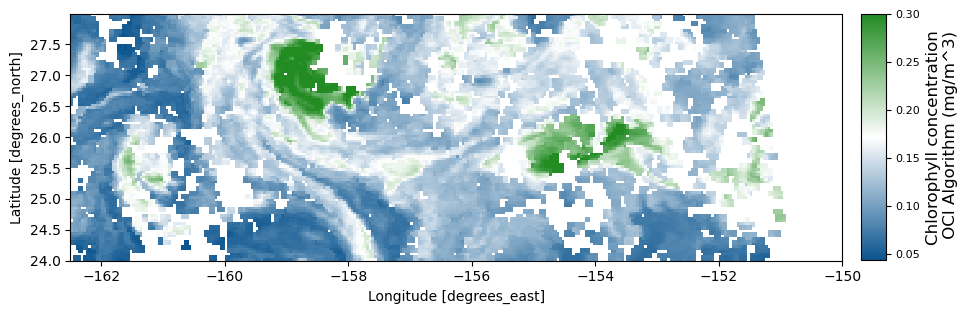

In [63]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Open the dataset
dataset = xr.open_dataset(paths[38])

# Subset the dataset within the specified region
subset = dataset.sel(lon=slice(-162.5, -150), lat=slice(28, 24))
chla = subset["chlor_a"]

# Define the colors: dodgerblue to white to forest green
colors = ['#0A548E', 'white', 'forestgreen']

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Set the figure size to [12, 20]
plt.figure(figsize=[12, 20])

# Plot the chlorophyll-a concentration using the custom colormap, but without a colorbar
artist = chla.plot(cmap=custom_cmap, vmax=0.3, add_colorbar=False)

# Set the aspect ratio to be equal
plt.gca().set_aspect("equal")

# Add a custom, smaller colorbar
cbar = plt.colorbar(artist, ax=plt.gca(), shrink=0.16, aspect=10, pad=0.02)
cbar.ax.tick_params(labelsize=8)  # Optional: adjust tick label size
cbar.ax.set_ylabel('Chlorophyll concentration\n OCI Algorithm (mg/m^3)', fontsize=12)

# Show the plot
plt.show()


In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import ipywidgets as widgets
from IPython.display import display

# Define the colors: dodgerblue to white to forest green
colors = ['#0A548E', 'white', 'forestgreen']

# Create the custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Function to plot the chlorophyll-a map for a given dataset index
def plot_chla_map(dataset_index):
    plt.figure(figsize=[12, 20])
    
    # Open the dataset
    dataset = xr.open_dataset(paths[dataset_index])
    
    # Subset the dataset within the specified region
    subset = dataset.sel(lon=slice(-162.5, -150), lat=slice(28, 24))
    chla = subset["chlor_a"]
    
    # Plot the chlorophyll-a concentration using the custom colormap, without a colorbar
    artist = chla.plot(cmap=custom_cmap, vmax=0.3, add_colorbar=False)
    
    # Set the aspect ratio to be equal
    plt.gca().set_aspect("equal")
    
    # Add a custom, smaller colorbar
    cbar = plt.colorbar(artist, ax=plt.gca(), shrink=0.16, aspect=10, pad=0.02)
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_ylabel('Chlorophyll concentration, OCI Algorithm (mg/m^3)', fontsize=12)
    
    # Set the title
    plt.title(f'Chlorophyll-a Map - Dataset {dataset_index}')
    
    plt.show()

# Create an interactive slider
slider = widgets.IntSlider(value=1, min=1, max=56, step=1, description='Dataset Index:')
widgets.interact(plot_chla_map, dataset_index=slider)

# Display the interactive widget
display(slider)


interactive(children=(IntSlider(value=1, description='Dataset Index:', max=56, min=1), Output()), _dom_classes…

IntSlider(value=1, description='Dataset Index:', max=56, min=1)

In [ ]:
-159.5, -157.5 26, 27.5